In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pyproj
from shapely import geometry
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
data = pd.read_csv('../database/csv/data_cacorrigido.csv')

In [3]:
data.head()

,Unnamed: 0,X,Y,MDT,MAGIGRF,KPERC,eU,eTh,CTCOR,THKRAZAO,geometry
0,0,329409.535034,7.614512e+06,791.177786,63.210708,1.978375,1.504629,16.876280,29.213498,8.102198,POINT (329409.5350343678 7614512.401901523)
1,1,329933.601050,7.614512e+06,791.177786,63.210708,1.978375,1.504629,16.876280,29.213498,8.102198,POINT (329933.6010501397 7614512.401901523)
2,2,330457.667066,7.614512e+06,815.148309,92.628801,1.330716,1.573530,15.654966,26.709422,10.196781,POINT (330457.6670659116 7614512.401901523)
3,3,330981.733082,7.614512e+06,840.713890,93.477878,1.996811,1.072332,17.751114,29.164289,8.898593,POINT (330981.7330816835 7614512.401901523)
4,4,331505.799097,7.614512e+06,834.608171,63.673708,0.515239,1.277961,13.707283,22.722158,15.575384,POINT (331505.7990974553 7614512.401901523)


In [4]:
data['geometry'] = [geometry.Point(x, y) for x, y in zip(data['X'], data['Y'])]
crs = "+proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
data = gpd.GeoDataFrame(data, geometry='geometry', crs=crs)
data.head()

,Unnamed: 0,X,Y,MDT,MAGIGRF,KPERC,eU,eTh,CTCOR,THKRAZAO,geometry
0,0,329409.535034,7.614512e+06,791.177786,63.210708,1.978375,1.504629,16.876280,29.213498,8.102198,POINT (329409.535 7614512.402)
1,1,329933.601050,7.614512e+06,791.177786,63.210708,1.978375,1.504629,16.876280,29.213498,8.102198,POINT (329933.601 7614512.402)
2,2,330457.667066,7.614512e+06,815.148309,92.628801,1.330716,1.573530,15.654966,26.709422,10.196781,POINT (330457.667 7614512.402)
3,3,330981.733082,7.614512e+06,840.713890,93.477878,1.996811,1.072332,17.751114,29.164289,8.898593,POINT (330981.733 7614512.402)
4,4,331505.799097,7.614512e+06,834.608171,63.673708,0.515239,1.277961,13.707283,22.722158,15.575384,POINT (331505.799 7614512.402)


In [5]:
data.shape

(5800, 11)

<AxesSubplot:>

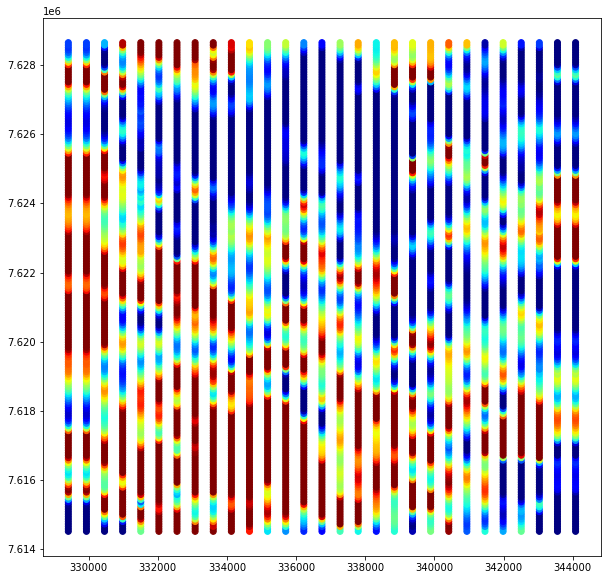

In [6]:
data.plot(figsize = (10, 10), column = 'THKRAZAO', cmap = 'jet', vmin = np.percentile(data.THKRAZAO,20),
          vmax = np.percentile(data.THKRAZAO,80))

<AxesSubplot:>

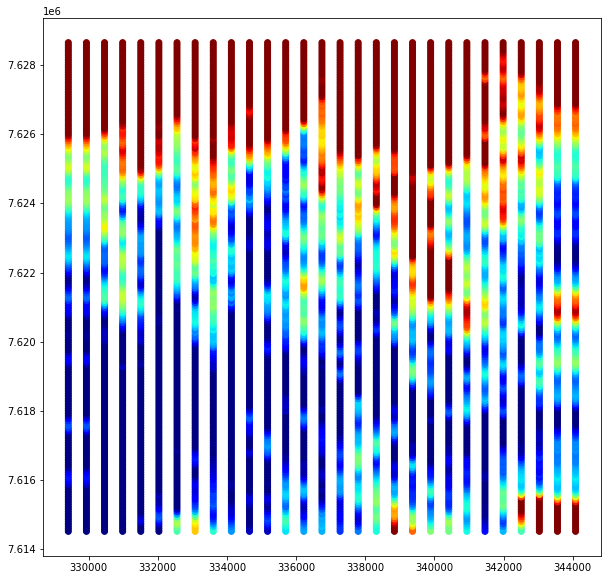

In [7]:
data.plot(figsize = (10, 10), column = 'MDT', cmap = 'jet', vmin = np.percentile(data.MDT,20),
          vmax = np.percentile(data.MDT,80))

In [ ]:
dist_Y = []

for i in range(len(data)-1):
    dif = data.Y[i+1] -data.Y[i]
    dist_Y.append(dif)
    
print(np.mean(dist_Y))
dist_Y

In [ ]:
xu, yu = regular(shape = (1500, 400),
                     area = (292276.074134, 345032.438156,
                             7.564166e+06,  7.636970e+06))

In [ ]:
sx, sy = spacing(shape = (1500, 300),
                     area = (292276.074134, 345032.438156,
                             7.564166e+06,  7.636970e+06))